# 作业3

### 第1题：Numpy 练习

以下运算都可以调用相应的函数而避免使用显式循环。

(a) 生成1000个服从 (0, 1) 间均匀分布的随机数，赋值给变量 `x`，并打印其最后10个元素。

In [2]:
# 此处插入代码
import numpy as np
x = np.random.uniform(low=0, high=1, size=1000)
print(x[:10])


[0.90139716 0.96137526 0.79186492 0.31479132 0.53447963 0.24150849
 0.21651444 0.32345213 0.27859889 0.37632126]


(b) 创建向量 `y`，令其在数学上等于 $y=-\log(x)$，其中 $\log$ 为自然对数，并打印其前10个元素。查找在 Python 中绘制图形的方法，绘制 `y` 的直方图。

[0.10380932 0.03939045 0.23336446 1.15584534 0.62646167 1.42085066
 1.53009805 1.12870415 1.2779822  0.97731209]


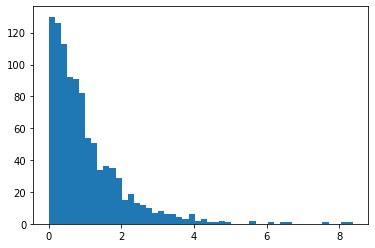

In [10]:
# 此处插入代码
import matplotlib.pyplot as plt
y = -np.log(x)
print(y[:10])

plt.hist(y,bins=50)
plt.show()

(c) 猜测或证明 `y` 服从什么分布，并简要说明理由。

（此处输入文字）

$y\sim \exp (1)$，理由如下：

$$
P(Y\le y) = P(-log(X) \le y) = P(X \ge e^{-y}) =1 - P(X \le e^{-y}) = 1 - e^{-y}
$$

此即为$\exp(1)$的cdf.

(d) 将 `y` 转为 $200\times 5$ 的矩阵，赋值给 `mat1`，元素**按行排列**。打印其前5行。

In [23]:
# 此处插入代码
print(y[:10])
mat1 = y.reshape(200,5)
print(mat1[:5,:])

[0.10380932 0.03939045 0.23336446 1.15584534 0.62646167 1.42085066
 1.53009805 1.12870415 1.2779822  0.97731209]
[[0.10380932 0.03939045 0.23336446 1.15584534 0.62646167]
 [1.42085066 1.53009805 1.12870415 1.2779822  0.97731209]
 [0.35176214 1.87452868 0.93068971 1.8775319  2.2551998 ]
 [2.98988626 0.57568711 0.63527543 1.21432546 2.95986801]
 [0.14422421 0.21212673 1.00026341 0.56061211 0.76977075]]


(e) 将 `y` 转为 $200\times 5$ 的矩阵，赋值给 `mat2`，元素**按列排列**。打印其前5行。（提示：可以使用转置操作）

In [27]:
# 此处插入代码
mat2 = y.reshape(5,200).transpose()
print(mat2[:5,:])

[[0.10380932 1.79505955 0.51025233 2.06843916 0.33062291]
 [0.03939045 0.09025764 1.76006664 0.57801496 0.73730628]
 [0.23336446 0.78305442 1.11270689 0.56750169 1.65846611]
 [1.15584534 0.42151143 1.14795646 1.33079574 0.63026981]
 [0.62646167 0.02488262 0.2132344  0.47253045 0.92994438]]


(f) 计算 `mat1` 每一列的均值，得到一个长度为5的向量 `v`，将其打印出来。然后将 `mat1` 的每一列进行中心化（即减去各自的均值），赋给变量 `mat1_centered`。类似地，计算 `mat1_centered` 的列均值向量并打印出来。

In [46]:
# 此处插入代码
v = np.mean(mat1,axis = 0)
print(f"v:{v}")

mat1_centered = mat1 - v
mat1_centered_colmean = np.mean(mat1_centered,axis = 0)
print(f"mat1 centered column mean:{mat1_centered_colmean}\n")

v:[1.07740259 0.99387636 1.01091915 1.08278404 0.99857525]
mat1 centered column mean:[-2.08721929e-16 -1.07691633e-16 -3.23630012e-16 -1.64313008e-16
 -5.06261699e-16]



### 第2题：统计计算练习

(a) 生成一个 $10000\times 1000$ 的矩阵 `X`，每个元素服从标准正态分布。生成一个长度为 10000 的向量 `y`，每个元素服从均值为0、方差为2的正态分布。生成一个长度为 10000 的向量 `w`，每个元素服从 $(1,5)$ 上的均匀分布。

In [59]:
# 此处插入代码
X = np.random.normal(size=10000*1000).reshape(10000,1000)
y = np.random.normal(loc=0, scale=np.sqrt(2), size=10000)
w = np.random.uniform(low=1, high=5, size=10000)

(b) 使用恰当的方式计算 $\hat{y}=X(X^{T}WX)^{-1}X^{T}Wy$，其中 `W` 是以 `w` 为对角线的对角矩阵。

In [62]:
import time
t1 = time.time()


# 此处插入代码
W = np.diag(w)
X.dot(np.linalg.solve(X.transpose().dot(W.dot(X)),X.transpose().dot(W.dot(y))))

t2 = time.time()
print(f"running time: {t2 - t1} seconds.")

running time: 5.571836948394775 seconds.


### 第3题：PySpark RDD 练习

利用如下代码模拟生成一个 $100000\times 10$ 的矩阵，并写入文件 `sim_data.txt`。

In [29]:
import numpy as np
np.random.seed(123)
dat = np.random.uniform(size=(100000, 10))
np.savetxt("sim_data.txt", dat, fmt="%.6f", delimiter=",")

使用合适的命令以单机模式启动 PySpark，并使用4个 CPU 核心。

In [26]:
# 此处插入代码
import findspark
findspark.init("/Users/xinby/Library/Spark")

from pyspark.sql import SparkSession
# 本地模式
spark = SparkSession.builder.\
    master("local[4]").\
    appName("PySpark RDD").\
    getOrCreate()
sc = spark.sparkContext
sc.setLogLevel("ERROR")
print(spark)
print(sc)

<SparkContext master=local[4] appName=PySpark RDD>


利用 PySpark 读取文件并打印出前5行：

In [30]:
file = sc.textFile("sim_data.txt")

text = file.take(5)
print(*text,sep="\n")

0.696469,0.286139,0.226851,0.551315,0.719469,0.423106,0.980764,0.684830,0.480932,0.392118
0.343178,0.729050,0.438572,0.059678,0.398044,0.737995,0.182492,0.175452,0.531551,0.531828
0.634401,0.849432,0.724455,0.611024,0.722443,0.322959,0.361789,0.228263,0.293714,0.630976
0.092105,0.433701,0.430863,0.493685,0.425830,0.312261,0.426351,0.893389,0.944160,0.501837
0.623953,0.115618,0.317285,0.414826,0.866309,0.250455,0.483034,0.985560,0.519485,0.612895


利用 `map()` 函数，生成一个元素类型为 Numpy 向量的 RDD，其每一个元素对应原始文本数据的每一行。打印出该 RDD 的前5个元素。

In [15]:
# 此处插入代码
def txt_to_np (line):
    str_vec = line.split(",")
    return np.array(str_vec,dtype=float)
data = file.map(txt_to_np)

print(data.take(5))


[array([0.696469, 0.286139, 0.226851, 0.551315, 0.719469, 0.423106,
       0.980764, 0.68483 , 0.480932, 0.392118]), array([0.343178, 0.72905 , 0.438572, 0.059678, 0.398044, 0.737995,
       0.182492, 0.175452, 0.531551, 0.531828]), array([0.634401, 0.849432, 0.724455, 0.611024, 0.722443, 0.322959,
       0.361789, 0.228263, 0.293714, 0.630976]), array([0.092105, 0.433701, 0.430863, 0.493685, 0.42583 , 0.312261,
       0.426351, 0.893389, 0.94416 , 0.501837]), array([0.623953, 0.115618, 0.317285, 0.414826, 0.866309, 0.250455,
       0.483034, 0.98556 , 0.519485, 0.612895])]


利用 `map()` 和 `reduce()` 函数计算每一列的样本方差，并将结果打印出来。要求 `reduce()` 只能使用一次。

样本方差计算：$\frac{1}{n-1}(\sum_{i=1}^n x_i^2+n\bar x^2-2\bar x\sum_{i=1}^n x_i)$

In [16]:
# 此处插入代码
num,sum,sq_sum = data.map(lambda x: (1,x,x*x)).reduce(lambda x,y: (x[0]+y[0],x[1]+y[1],x[2]+y[2]))
mean = num/sum
sample_var = (sq_sum+num*mean*mean-2*mean*sum)/(num-1)
print(sample_var)

[2.31716648 2.32754202 2.37336266 2.33235583 2.3187797  2.34413241
 2.32762269 2.35790004 2.32921483 2.31506596]


将原始文件的 RDD 划为10个分区，然后利用 `mapPartitions()` 函数将每个分区转成一个 Numpy 矩阵，过滤掉空的矩阵，最后得到一个元素类型为 Numpy 矩阵的 RDD。然后打印出该 RDD 的元素个数。

In [31]:
# 此处插入代码
file_p10 = file.repartition(10)

def part_to_matr (iter):
    iter_arr = map(txt_to_np, iter)
    dat = list(iter_arr)

    if len(dat) < 1:
        mat = np.array([])
    else:
        mat = np.vstack(dat)
    yield mat

matdat_p10 = file_p10.mapPartitions(part_to_matr)
print(f"before filter:{matdat_p10.count()}")
matdat_p10_nonempt = matdat_p10.filter(lambda x: x.shape[0]>0)
print(f"after filter:{matdat_p10_nonempt.count()}")#??





before filter:10
after filter:10


array([[0.896426, 0.22327 , 0.268124, ..., 0.932089, 0.668001, 0.858727],
       [0.242447, 0.673928, 0.700871, ..., 0.753204, 0.52029 , 0.498688],
       [0.453728, 0.021647, 0.535141, ..., 0.039913, 0.98658 , 0.378121],
       ...,
       [0.362721, 0.62867 , 0.340324, ..., 0.436751, 0.439081, 0.300474],
       [0.988288, 0.423358, 0.170715, ..., 0.392543, 0.062153, 0.352748],
       [0.962157, 0.736197, 0.055439, ..., 0.691786, 0.877256, 0.786439]])

23/04/13 22:14:16 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:593)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:592)
	at org.apache.spar

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 64801)
Traceback (most recent call last):
  File "/Users/xinby/opt/anaconda3/lib/python3.9/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/Users/xinby/opt/anaconda3/lib/python3.9/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/Users/xinby/opt/anaconda3/lib/python3.9/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/Users/xinby/opt/anaconda3/lib/python3.9/socketserver.py", line 747, in __init__
    self.handle()
  File "/Users/xinby/Library/Spark/python/pyspark/accumulators.py", line 281, in handle
    poll(accum_updates)
  File "/Users/xinby/Library/Spark/python/pyspark/accumulators.py", line 253, in poll
    if func():
  File "/Users/xinby/Library/Spark/python/pyspark/accumulators.py", line 257

利用上述 RDD 和 `map()`、`reduce()` 函数计算每一列的样本方差，并将结果打印出来。要求 `reduce()` 只能使用一次。

In [149]:
# 此处插入代码 
# （？不太确定思路是否正确，
# 即这么操作是不是把本来想要简化的matPartition操作又复杂化了，
# 或者说我在做这个问题的时候没有感受到matPartition带来的便利）

num_p10, sum_p10, sq_sum_p10 = matdat_p10_nonempt\
    .map(lambda x: (x.shape[0],np.sum(x,axis=0), np.linalg.norm(x,ord=None,axis=0)**2))\
        .reduce(lambda x,y: (x[0]+y[0],x[1]+y[1],x[2]+y[2]))
# 其中map中lambda的第三个函数是相当于对矩阵求每个列的二范数的平方

mean_p10 = num_p10/sum_p10
sample_var_p10 = (sq_sum_p10+num_p10*mean_p10*mean_p10-2*mean_p10*sum_p10)/(num_p10-1)
print(sample_var_p10)

[2.31716648 2.32754202 2.37336266 2.33235583 2.3187797  2.34413241
 2.32762269 2.35790004 2.32921483 2.31506596]
